In [34]:
import numpy as np
from scipy.special import jn
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [35]:
def FBSE_S_transform(x, fs):
    f = x
    N = len(f)
    nb = np.arange(1, N+1)

    MM = N
    if 'alfa' not in locals():
        x = 2
        alfa = np.zeros(MM)
        for i in range(1, MM+1):
            ex = 1
            while abs(ex) > 0.00001:
                ex = -jn(0, x) / jn(1, x)
                x = x - ex
            alfa[i-1] = x
            print(f'Root # {i} = {x:.5f} ex = {ex:.6f}')
            x = x + np.pi

    a = N
    D = np.zeros((MM, N))
    for m1 in range(1, MM+1):
        D[m1-1, :] = jn(0, alfa[m1-1] / a * nb)

    a3 = np.zeros(MM)
    for m1 in range(1, MM+1):
        a3[m1-1] = (2 / (a**2 * (jn(1, alfa[m1-1]))**2)) * np.sum(nb * f * D[m1-1, :])

    invfk = 1 / alfa
    W = 2 * np.pi * 0.5 * alfa[:, np.newaxis] * invfk[np.newaxis, :]
    G = np.exp(-W**2 / 2)  # Gaussian in FBSE domain

    HW = toeplitz(a3)
    zz = HW * G

    y = np.abs(np.dot(zz, D))  # FBSE-DST time-frequency matrix
    fre = (alfa * fs) / (2 * np.pi * N)

    return a3, alfa, fre, y

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import scipy.io as sio

Root # 1 = 2.40483 ex = -0.000000
Root # 2 = 5.52008 ex = -0.000000
Root # 3 = 8.65373 ex = -0.000004
Root # 4 = 11.79153 ex = -0.000001
Root # 5 = 14.93092 ex = -0.000000
Root # 6 = 18.07106 ex = -0.000000
Root # 7 = 21.21164 ex = -0.000000
Root # 8 = 24.35247 ex = -0.000000
Root # 9 = 27.49348 ex = -0.000000
Root # 10 = 30.63461 ex = -0.000000
Root # 11 = 33.77582 ex = -0.000000
Root # 12 = 36.91710 ex = -0.000000
Root # 13 = 40.05843 ex = -0.000000
Root # 14 = 43.19979 ex = -0.000000
Root # 15 = 46.34119 ex = -0.000000
Root # 16 = 49.48261 ex = -0.000000
Root # 17 = 52.62405 ex = -0.000000
Root # 18 = 55.76551 ex = -0.000000
Root # 19 = 58.90698 ex = -0.000000
Root # 20 = 62.04847 ex = -0.000000
Root # 21 = 65.18996 ex = -0.000000
Root # 22 = 68.33147 ex = -0.000000
Root # 23 = 71.47298 ex = -0.000000
Root # 24 = 74.61450 ex = -0.000000
Root # 25 = 77.75603 ex = -0.000000
Root # 26 = 80.89756 ex = -0.000000
Root # 27 = 84.03909 ex = -0.000000
Root # 28 = 87.18063 ex = -0.000000
Root

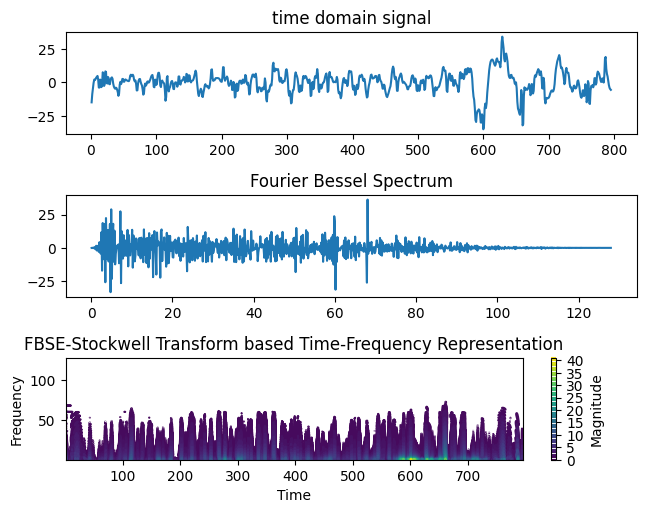

<Figure size 640x480 with 0 Axes>

In [38]:
mat_data = sio.loadmat('/content/drive/MyDrive/signalfile/sig.mat')
x = mat_data['sig'].flatten()
fs = 256

# Compute FBSE-S transform
a3, alfa, fre, y = FBSE_S_transform(x, fs)

# Create time vector
t = np.arange(1, len(x) + 1)
plt.subplot(3, 1, 1)
plt.plot(t, x)
plt.title('time domain signal')
plt.tight_layout()

plt.subplot(3, 1, 2)
plt.plot(fre, a3)
plt.title('Fourier Bessel Spectrum')
plt.tight_layout()
# Plot contour
plt.subplot(3, 1, 3)
contour_plot=plt.contour(t, fre, y, levels=40)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('FBSE-Stockwell Transform based Time-Frequency Representation')
colorbar = plt.colorbar(contour_plot)
colorbar.set_label('Magnitude')
plt.show()
plt.tight_layout()